<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import tensorflow

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]]
)

(-0.5, 2.5, 3.5, -0.5)

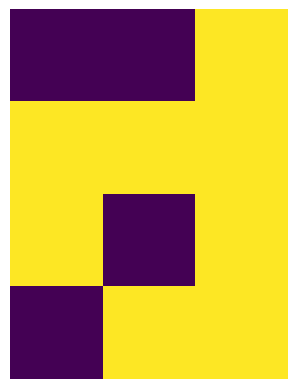

In [3]:
pl.imshow(X);
pl.axis('off')

In [4]:
y=np.array([[0,1,1,0]]).T

In [5]:
y.shape

(4, 1)

In [6]:
print('input\n',X)
print('output\n',y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# basic architecture: 1 layer 
4 osservazioni
3 neuroni
1 layer 

In [7]:
# dobbiamo costruire una activation function
def sigmoid(x): 
  return 1./(1.+np.exp(-x))

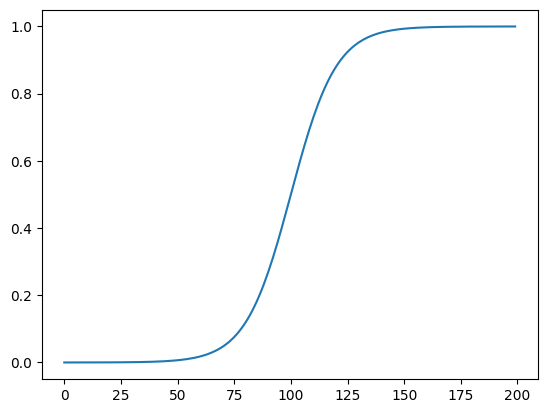

In [8]:
pl.plot(sigmoid(np.arange(-10,10,0.1)));

In [9]:
#definiamo la loss function che andremo ad utilizzare
def loss(prediction, target): 
  return target - prediction 

In [10]:
def dsigmoid(s):
  return s * (1. - s)

## Neural Network 

In [11]:
#devo fare una procedura di stochastic gradient descent 

training = 6000 #numero di epoche 

In [12]:
# creiamo il primo layer di synopses / neurons 
# i layer di neurons sono dei numpy array 
# 4 x 3 è la dimensione 
np.random.seed(302)

syn0 = 2 * np.random.random((3, 1)) - 1 #normalized 0-1
syn0.shape
print(syn0)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]


In [13]:
loss_output = []

for iter in range(training): 
  inputLayer = X 

  # forward propagation 
  # linear regression 
  l1 = np.dot(inputLayer, syn0)
  #activations
  
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  #calculate correction
  output_delta = output_error * dsigmoid(output)
  #apply correction to weights 
  syn0 += np.dot(inputLayer.T, output_delta) 
  #inserire layer tra input e output si chiama backpropagation

print('outpur after training\n', output)
print('output target\n', y)

outpur after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

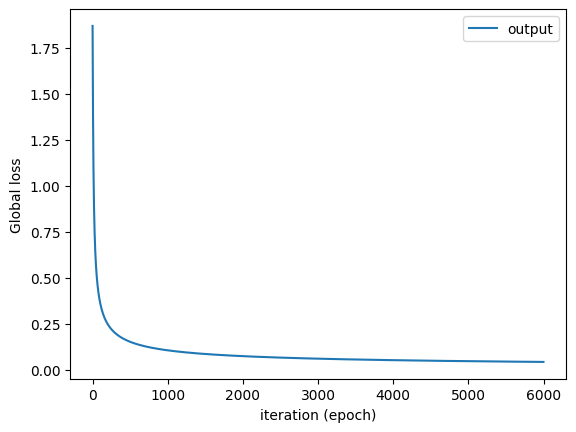

In [14]:
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('Global loss')

#Doppio Layer

[[ 0.05205685  0.37063437  0.67134838  0.30753052 -0.92595609]
 [-0.63968867  0.52113884 -0.55139077  0.47027015 -0.42501908]
 [ 0.46556001 -0.78470504 -0.81229568  0.56637815  0.03919479]]


Text(0, 0.5, 'Global loss')

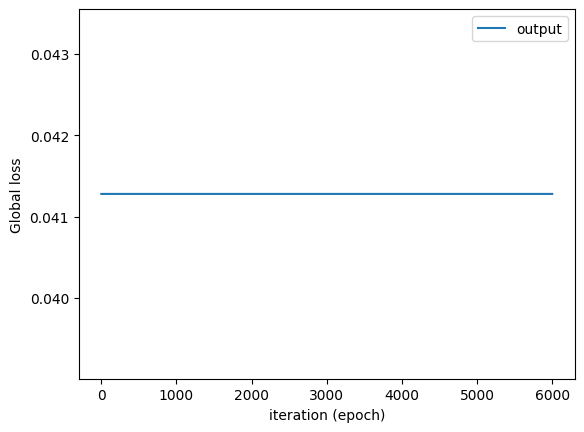

In [15]:
np.random.seed(222)

syn0 = 2 * np.random.random((3, 5)) - 1 #normalized 0-1 
#syn0 è il vettore dei pesi
syn0.shape
print(syn0)

syn1=2 * np.random.random((5,1)) - 1

loss_output = []
loss_hidden = []

for iter in range(training): 
  inputLayer = X 

  l1 = np.dot(inputLayer, syn0)
  hidden=sigmoid(l1)
  
  #Error on the first layer 
  hidden_error = output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())
  hidden_delta=hidden_error * dsigmoid(hidden)

  syn0 += np.dot(inputLayer.T, hidden_delta)

  l2 = np.dot(hidden, syn1)
  output = sigmoid(l2)

  outpur_error=loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  output_delta = output_error * dsigmoid(output)

  syn1 += np.dot(hidden.T, output_delta)

pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('Global loss')

  

In [16]:
from tensorflow import keras 

In [17]:
#creiamo l'hidden layer
hlayer = keras.layers.Dense(5, input_dim = 3, activation ='sigmoid')
#usiamo un dense multilayer perceptron
#creiamo l'output layer
olayer = keras.layers.Dense(1, activation ='linear') 
model = keras.Sequential([hlayer, olayer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = 'mae', optimizer = 'adam', metrics=['accuracy', 'mae'])
#mae= mean absolute error; 

In [19]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.5715 - accuracy: 0.5000 - mae: 0.5715
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5673 - accuracy: 0.5000 - mae: 0.5673
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.5631 - accuracy: 0.5000 - mae: 0.5631
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5589 - accuracy: 0.5000 - mae: 0.5589
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5547 - accuracy: 0.5000 - mae: 0.5547
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.5506 - accuracy: 0.5000 - mae: 0.5506
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5464 - accuracy: 0.5000 - mae: 0.5464
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5422 - accuracy: 0.5000 - mae: 0.5422
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5380 - accuracy: 0.5000

In [20]:
model.predict(X)

1/1 [==============================] - 0s 87ms/step


array([[-1.1775792e-03],
       [ 9.9877083e-01],
       [ 1.0007794e+00],
       [ 6.5155327e-04]], dtype=float32)